┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = generate(::Int64, ::Main.Ntl.Models.GaussianParameters, ::Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals}) at synthetic.jl:119
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:119
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = generate(::Int64, ::Main.Ntl.Models.GaussianParameters, ::Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals}) at synthetic.jl:121
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:121


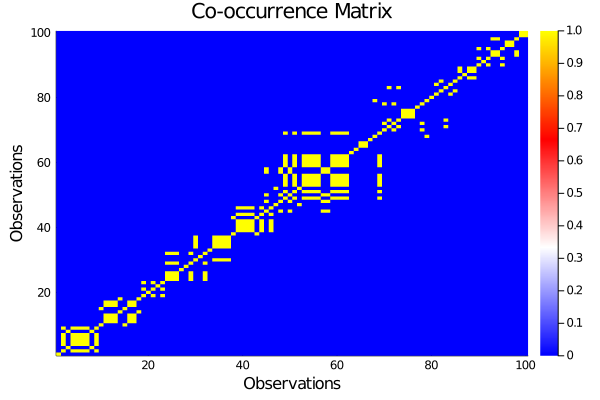

In [8]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)

data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture = Ntl.Generate.generate(100, data_parameters, cluster_parameters)
data = Matrix(transpose(mixture[:, 2:end]))
true_clustering = mixture[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

100.0%┣█████████████████████████████████████┫ 9999/9999 [03:31<00:00, 47.3 it/s]


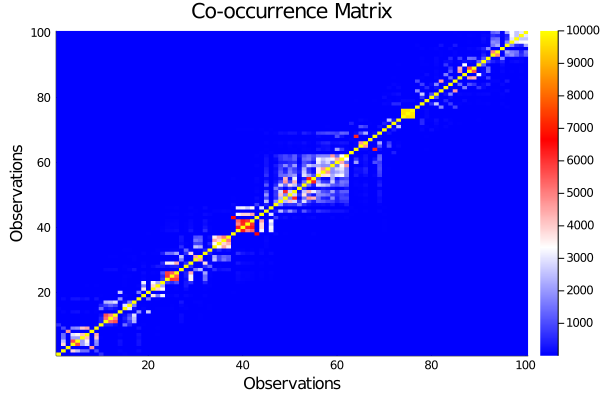

In [9]:
cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
markov_chain = Ntl.Fitter.fit(data, data_parameters, cluster_parameters, num_instances=10000, method="gibbs")
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))

100.0%┣██████████████████████████████████████████┫ 99/99 [01:09<00:00, 1.4 it/s]


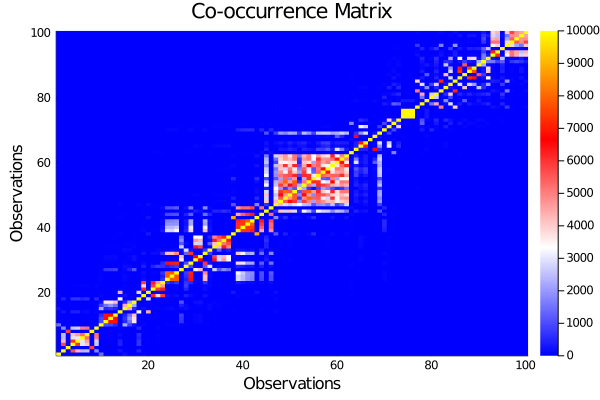

In [11]:
cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
markov_chain = Ntl.Fitter.fit(data, data_parameters, cluster_parameters, num_instances=10000, method="smc")
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))

100.0%┣████████████████████████████████████┫ 9999/9999 [00:19<00:00, 528.1 it/s]


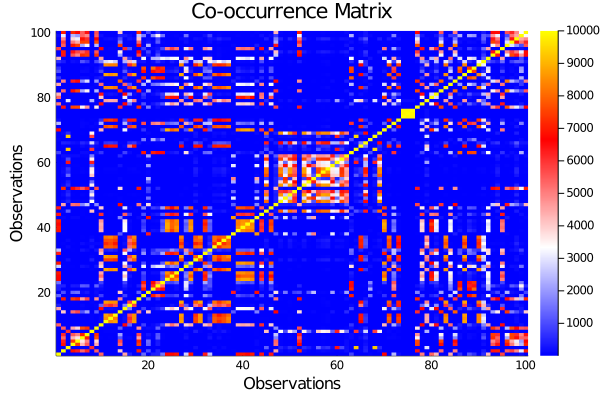

In [10]:
cluster_parameters = Ntl.Models.DpParameters(1)
markov_chain = Ntl.Fitter.fit(data, data_parameters, cluster_parameters, num_instances=10000, method="gibbs")
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))